In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/human-activity-recognition-with-smartphones/train.csv
/kaggle/input/human-activity-recognition-with-smartphones/test.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [15]:
df = pd.read_csv('/kaggle/input/human-activity-recognition-with-smartphones/train.csv').drop(columns='subject')
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [16]:
df['Activity'].value_counts()

Activity
LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: count, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

x=df.drop('Activity',axis=1)
y=df['Activity']

le=LabelEncoder()
y=le.fit_transform(y)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)


In [18]:
print(x_train.shape)
print(x_test.shape)

(5881, 561)
(1471, 561)


# **Apply Logistic Regression on 561 features**

In [19]:
log_reg=LogisticRegression(max_iter=100)

log_reg.fit(x_train,y_train)

y_pred=log_reg.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Model accuracy_score = ",accuracy)

Model accuracy_score =  0.9843643779741672


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
## create function to check duplicate cols...
def get_all_duplicate_cols(df):
    duplicate_cols={}
    seen_cols={}

    for col_name in df.columns:
        curr_col=df[col_name]
        try:
            curr_col_hash=curr_col.values.tobytes()
        except AttributeError:
            curr_col_hash=curr_col.to_string().encode()
        if curr_col_hash in seen_cols:
            if seen_cols[curr_col_hash] in duplicate_cols:
                duplicate_cols[seen_cols[curr_col_hash]].append(col_name)
            else:
                duplicate_cols[seen_cols[curr_col_hash]]=[col_name]
        else:
            seen_cols[curr_col_hash]=col_name
    return duplicate_cols

In [21]:
duplicate_cols=get_all_duplicate_cols(x)
duplicate_cols

{'tBodyAccMag-mean()': ['tBodyAccMag-sma()',
  'tGravityAccMag-mean()',
  'tGravityAccMag-sma()'],
 'tBodyAccMag-std()': ['tGravityAccMag-std()'],
 'tBodyAccMag-mad()': ['tGravityAccMag-mad()'],
 'tBodyAccMag-max()': ['tGravityAccMag-max()'],
 'tBodyAccMag-min()': ['tGravityAccMag-min()'],
 'tBodyAccMag-energy()': ['tGravityAccMag-energy()'],
 'tBodyAccMag-iqr()': ['tGravityAccMag-iqr()'],
 'tBodyAccMag-entropy()': ['tGravityAccMag-entropy()'],
 'tBodyAccMag-arCoeff()1': ['tGravityAccMag-arCoeff()1'],
 'tBodyAccMag-arCoeff()2': ['tGravityAccMag-arCoeff()2'],
 'tBodyAccMag-arCoeff()3': ['tGravityAccMag-arCoeff()3'],
 'tBodyAccMag-arCoeff()4': ['tGravityAccMag-arCoeff()4'],
 'tBodyAccJerkMag-mean()': ['tBodyAccJerkMag-sma()'],
 'tBodyGyroMag-mean()': ['tBodyGyroMag-sma()'],
 'tBodyGyroJerkMag-mean()': ['tBodyGyroJerkMag-sma()'],
 'fBodyAccMag-mean()': ['fBodyAccMag-sma()'],
 'fBodyBodyAccJerkMag-mean()': ['fBodyBodyAccJerkMag-sma()'],
 'fBodyBodyGyroMag-mean()': ['fBodyBodyGyroMag-sma()'

In [22]:
for list_cols in duplicate_cols.values():
    x_train.drop(columns=list_cols,inplace=True)
    x_test.drop(columns=list_cols,inplace=True)

print(x_train.shape)
print(x_test.shape)

(5881, 540)
(1471, 540)


# **Variance Threshold**

*Import the VarianceThreshold feature selector from scikit-learn. This class removes features whose variance is below a given threshold (i.e., almost constant features).*

In [23]:
from sklearn.feature_selection import VarianceThreshold
sel=VarianceThreshold(threshold=0.05)

sel.fit(x_train)

VarianceThreshold(threshold=0.05)

In [24]:
cols=x_train.columns[sel.get_support()]
sel.variances_

array([0.00479298, 0.00160806, 0.00292878, 0.20254653, 0.2519202 ,
       0.1743119 , 0.18083248, 0.2356147 , 0.17042619, 0.29661141,
       0.07950815, 0.08535651, 0.1334079 , 0.1172653 , 0.08832759,
       0.22257028, 0.06810546, 0.01571713, 0.04872365, 0.13856067,
       0.13794659, 0.14856987, 0.21801614, 0.19175377, 0.1374122 ,
       0.09416413, 0.06053895, 0.05920788, 0.05301815, 0.06580195,
       0.04585734, 0.04369701, 0.04940989, 0.08120326, 0.04641895,
       0.05540387, 0.05421461, 0.13170381, 0.10973804, 0.14835017,
       0.26697446, 0.13920868, 0.12041074, 0.00560383, 0.00819406,
       0.01033404, 0.0053858 , 0.00798912, 0.01011086, 0.26033184,
       0.13042246, 0.11719707, 0.25847107, 0.13739161, 0.12216157,
       0.16177122, 0.48775551, 0.19253845, 0.1885009 , 0.00480618,
       0.00736129, 0.00916881, 0.1336403 , 0.0792813 , 0.15725931,
       0.04643016, 0.0439266 , 0.04335607, 0.04464494, 0.08570417,
       0.08946209, 0.08512175, 0.08030459, 0.07252637, 0.06753

In [25]:
x_train=sel.transform(x_train)
x_test=sel.transform(x_test)


In [26]:
x_train=pd.DataFrame(x_train,columns=cols)
x_test=pd.DataFrame(x_test,columns=cols)


print(x_train.shape)
print(x_test.shape)

(5881, 352)
(1471, 352)


# Correlation 

*Correlation measures the strength and direction of the relationship between two variables.
If two variables change together → they’re correlated.
If they don’t move together → no correlation.
It’s usually expressed as a number between -1 and +1.*

<Axes: >

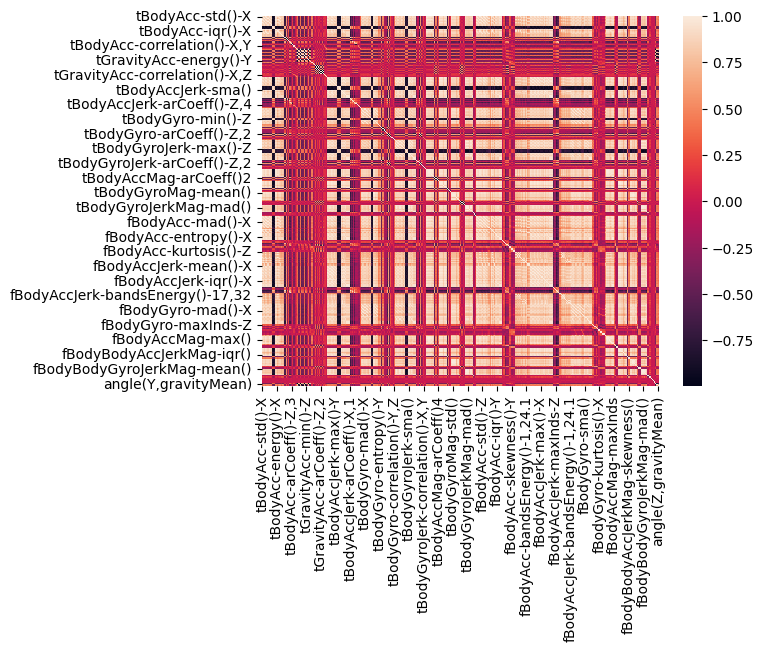

In [27]:
import seaborn as sns 
sns.heatmap(x_train.corr())

In [28]:
corr_matrix=x_train.corr()
corr_matrix

,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
tBodyAcc-std()-X,1.000000,0.926364,0.852368,0.998645,0.919277,0.847050,0.980997,0.895548,0.846914,-0.966419,...,-0.055570,0.141267,0.110837,-0.027673,-0.020901,0.015583,-0.015573,-0.371908,0.472633,0.404940
tBodyAcc-std()-Y,0.926364,1.000000,0.895790,0.921933,0.997321,0.894824,0.915852,0.954369,0.886567,-0.936912,...,-0.093510,0.201569,0.174981,-0.016281,-0.011158,-0.012296,-0.003765,-0.379022,0.525827,0.441522
tBodyAcc-std()-Z,0.852368,0.895790,1.000000,0.845231,0.891888,0.997434,0.855216,0.867654,0.937258,-0.860280,...,-0.089563,0.150807,0.121253,-0.002068,-0.023559,-0.018134,0.002050,-0.346252,0.479191,0.493398
tBodyAcc-mad()-X,0.998645,0.921933,0.845231,1.000000,0.914703,0.840035,0.973438,0.890375,0.840761,-0.962241,...,-0.049497,0.142403,0.112947,-0.035365,-0.020499,0.016472,-0.015614,-0.368497,0.468125,0.400942
tBodyAcc-mad()-Y,0.919277,0.997321,0.891888,0.914703,1.000000,0.891683,0.908475,0.949911,0.881960,-0.931904,...,-0.090910,0.195826,0.170317,-0.019130,-0.011144,-0.016534,-0.001069,-0.375265,0.527543,0.439652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"angle(tBodyGyroMean,gravityMean)",0.015583,-0.012296,-0.018134,0.016472,-0.016534,-0.023206,0.020434,-0.010795,-0.029686,-0.000046,...,-0.022366,0.030224,0.020036,-0.007010,0.025223,1.000000,-0.115742,-0.001594,-0.016301,-0.023203
"angle(tBodyGyroJerkMean,gravityMean)",-0.015573,-0.003765,0.002050,-0.015614,-0.001069,0.001359,-0.019308,0.009350,0.004754,0.009627,...,0.009418,-0.011888,-0.007305,-0.013567,0.032572,-0.115742,1.000000,0.020279,-0.003382,-0.003004
"angle(X,gravityMean)",-0.371908,-0.379022,-0.346252,-0.368497,-0.375265,-0.348878,-0.384158,-0.370252,-0.350675,0.363087,...,0.091572,-0.086004,-0.078097,0.007547,0.019830,-0.001594,0.020279,1.000000,-0.786840,-0.660005
"angle(Y,gravityMean)",0.472633,0.525827,0.479191,0.468125,0.527543,0.481251,0.481636,0.491468,0.469099,-0.472729,...,-0.100425,0.089270,0.079668,0.002512,-0.012314,-0.016301,-0.003382,-0.786840,1.000000,0.596898


In [29]:
cols_name=corr_matrix.columns

cols_to_drop=[]

for i in range(len(cols_name)):
    for j in range(i+1,len(cols_name)):
        if corr_matrix.loc[cols_name[i],cols_name[j]]>0.95:
            cols_to_drop.append(cols_name[j])

print(len(cols_to_drop))

1520


In [30]:
cols_to_drop=set(cols_to_drop)

print(len(cols_to_drop))
cols_to_drop

198


{'fBodyAcc-bandsEnergy()-1,16',
 'fBodyAcc-bandsEnergy()-1,16.1',
 'fBodyAcc-bandsEnergy()-1,16.2',
 'fBodyAcc-bandsEnergy()-1,24',
 'fBodyAcc-bandsEnergy()-1,24.1',
 'fBodyAcc-bandsEnergy()-1,24.2',
 'fBodyAcc-bandsEnergy()-1,8',
 'fBodyAcc-bandsEnergy()-17,32',
 'fBodyAcc-energy()-X',
 'fBodyAcc-energy()-Y',
 'fBodyAcc-entropy()-X',
 'fBodyAcc-entropy()-Y',
 'fBodyAcc-entropy()-Z',
 'fBodyAcc-iqr()-X',
 'fBodyAcc-iqr()-Y',
 'fBodyAcc-iqr()-Z',
 'fBodyAcc-kurtosis()-X',
 'fBodyAcc-kurtosis()-Y',
 'fBodyAcc-kurtosis()-Z',
 'fBodyAcc-mad()-X',
 'fBodyAcc-mad()-Y',
 'fBodyAcc-mad()-Z',
 'fBodyAcc-max()-X',
 'fBodyAcc-max()-Y',
 'fBodyAcc-max()-Z',
 'fBodyAcc-mean()-X',
 'fBodyAcc-mean()-Y',
 'fBodyAcc-mean()-Z',
 'fBodyAcc-sma()',
 'fBodyAcc-std()-X',
 'fBodyAcc-std()-Y',
 'fBodyAcc-std()-Z',
 'fBodyAccJerk-bandsEnergy()-1,16.1',
 'fBodyAccJerk-bandsEnergy()-1,24.1',
 'fBodyAccJerk-bandsEnergy()-1,8',
 'fBodyAccJerk-bandsEnergy()-17,24.1',
 'fBodyAccJerk-bandsEnergy()-17,32',
 'fBodyAccJ

In [31]:
x_train.drop(columns=cols_to_drop,inplace=True,axis=1)
x_test.drop(columns=cols_to_drop,inplace=True,axis=1)

print(x_train.shape)
print(x_test.shape)

(5881, 154)
(1471, 154)


# ANOVA 
*It is a statistical test used to check if 3 or more groups have different means.*

**How It Work**

Suppose Y is categorical (e.g., spam vs not spam, disease vs healthy).

X is a continuous numerical feature (e.g., word frequency, blood pressure).

ANOVA checks whether the mean of X is significantly different across different classes of Y.

📌 If X values are similar across classes, then X is not useful.
📌 If X values differ significantly across classes, then X is a good feature.

In [41]:
from sklearn.feature_selection import f_classif  
from sklearn.feature_selection import SelectKBest

sel=SelectKBest(f_classif,k=100).fit(x_train,y_train)
best100_features=x_train.columns[sel.get_support()]
best100_features

Index(['tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y',
       'tBodyAcc-min()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y',
       'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1',
       'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-Y,1',
       'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-correlation()-X,Y',
       'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X',
       'tGravityAcc-mean()-Y', 'tGravityAcc-mean()-Z', 'tGravityAcc-sma()',
       'tGravityAcc-energy()-Y', 'tGravityAcc-energy()-Z',
       'tGravityAcc-entropy()-X', 'tGravityAcc-entropy()-Y',
       'tGravityAcc-arCoeff()-Y,1', 'tGravityAcc-arCoeff()-Y,2',
       'tGravityAcc-arCoeff()-Z,1', 'tGravityAcc-arCoeff()-Z,2',
       'tGravityAcc-correlation()-Y,Z', 'tBodyAccJerk-std()-Z',
       'tBodyAccJerk-min()-X', 'tBodyAccJerk-min()-Y', 'tBodyAccJerk-min()-Z',
       'tBodyAccJerk-entropy()-X', 'tBodyAccJerk-arCoeff()-X,3',
       'tBodyAccJ

In [42]:
x_train=pd.DataFrame(sel.transform(x_train),columns=best100_features)
x_test=pd.DataFrame(sel.transform(x_test),columns=best100_features)

print(x_train.shape)
print(x_test.shape)

(5881, 100)
(1471, 100)


# Apply Logistic Regression on 100 features

In [43]:
log_reg=LogisticRegression(max_iter=100)

log_reg.fit(x_train,y_train)

y_pred=log_reg.predict(x_test)

accuracy=accuracy_score(y_test,y_pred)
print("Model accuracy_score = ",accuracy)

Model accuracy_score =  0.9721278042148198


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Chi Square Test

In [45]:
titanic = pd.read_csv('/kaggle/input/titanic/train.csv')[['Pclass','Sex','SibSp','Parch','Embarked','Survived']]
titanic.head()

,Pclass,Sex,SibSp,Parch,Embarked,Survived
0,3,male,1,0,S,0
1,1,female,1,0,C,1
2,3,female,0,0,S,1
3,1,female,1,0,S,1
4,3,male,0,0,S,0


In [52]:
cross_table=pd.crosstab(titanic['Survived'],titanic['Sex'],margins=True)
cross_table

Sex,female,male,All
Survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


In [59]:
from scipy.stats import chi2_contingency
chi2_contingency(cross_table)

Chi2ContingencyResult(statistic=263.05057407065567, pvalue=1.0036732821369117e-55, dof=4, expected_freq=array([[193.47474747, 355.52525253, 549.        ],
       [120.52525253, 221.47474747, 342.        ],
       [314.        , 577.        , 891.        ]]))

[6.258462423531468e-20, 1.0036732821369117e-55, 0.0006709654974933448, 0.014554047586837713, 0.00018045058101554096]


<Axes: >

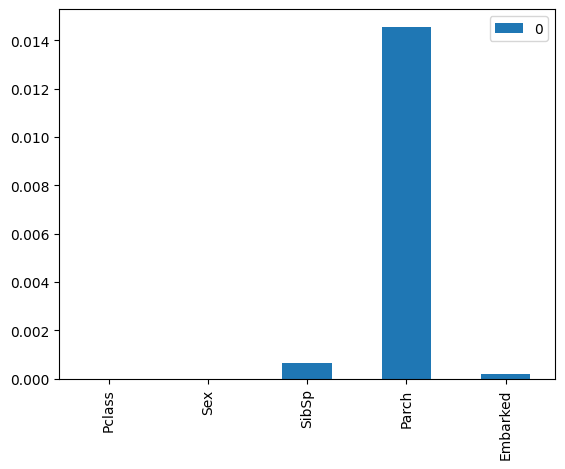

In [66]:
## check fro all input feature 

score=[]
for col in titanic.columns[:-1]:
    cross_table=pd.crosstab(titanic['Survived'],titanic[col],margins=True)
    p_val=chi2_contingency(cross_table)[1]
    score.append(p_val)
print(score)

pd.DataFrame(score,index=titanic.columns[:-1]).plot(kind="bar")

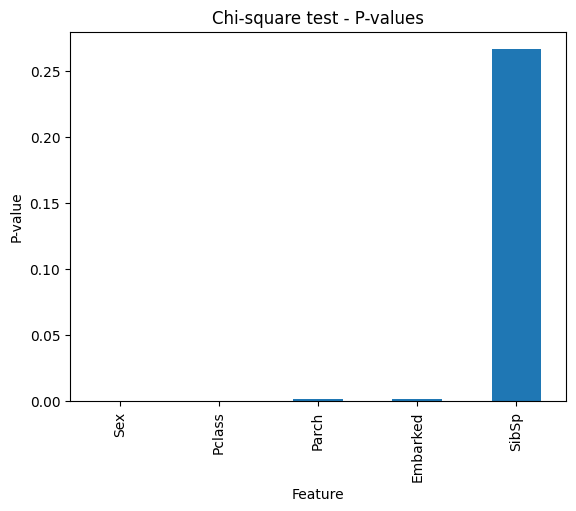

In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import matplotlib.pyplot as plt

# assuming titanic is your DataFrame and 'Survived' is the target column

# Encode categorical variables
le = LabelEncoder()
titanic_encoded = titanic.apply(le.fit_transform)

X = titanic_encoded.drop('Survived', axis=1)
y = titanic_encoded['Survived']

# Calculate chi-squared stats
chi_scores = chi2(X, y)

# chi_scores[1] are the p-values of each feature.
p_values = pd.Series(chi_scores[1], index = X.columns)
p_values.sort_values(inplace = True)

# Plotting the p-values
p_values.plot.bar()

plt.title('Chi-square test - P-values')
plt.xlabel('Feature')
plt.ylabel('P-value')

plt.show()